In [143]:
import matplotlib as mpl


so matplotlib has two layers. A backend layer, which knows about low level graphics routines it can render to the screen or to a file. We'll use the inline backend for most of our work.

And the artist layer, which describes primitives, collections, and containers. It knows how figures are composed of subfigures and where objects are in a given axes coordinate system. So with this, we can actually get started building figures and rendering them. But there's one more layer which is extremely important for us as data scientists in particular, and this is called the scripting layer.

You see, if we were writing an application to use matplotlib, we might never care about the scripting layer. But this layer helps simplify and speed up our interaction with the environment in order to build plots quickly. It does this, frankly, by doing a bunch of magic for us. And the difference between someone who is effective with matplotlib and someone who isn't, is usually based on their understanding of this magic of the scripting layer.

The scripting layer we use in this course is called pyplot.

So that describes the matplotlib layer cake. There's a backend, which deals with actual drawing. A bunch of artists on top of the backend, which describe how data is arranged. And a scripting layer, which actually creates those artists and choreographs them all together.

In [144]:
%matplotlib notebook
mpl.get_backend()

'nbAgg'

In [145]:
import matplotlib.pyplot as plt
plt.plot?


<IPython.core.display.Javascript object>


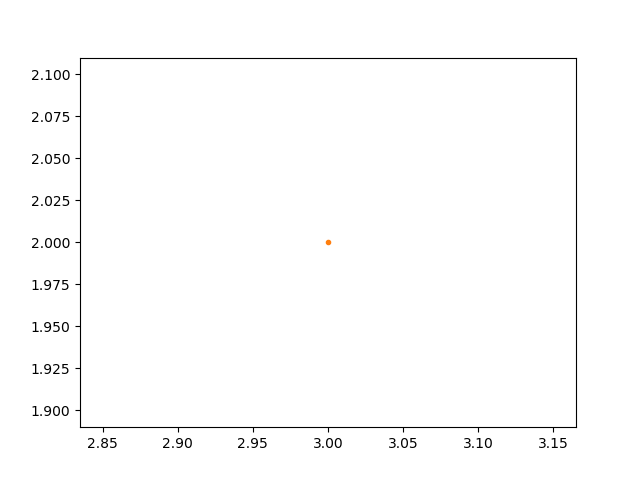

In [146]:
plt.plot(3,2)

In [147]:
plt.plot(3,2,'.')

In [148]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
fig =Figure()
canvas= FigureCanvasAgg(fig)

ax=fig.add_subplot(111)
ax.plot(3,2,'.')
canvas.print_png('test.png')


In [149]:
%%html
<img src='test.png'/>

<IPython.core.display.Javascript object>


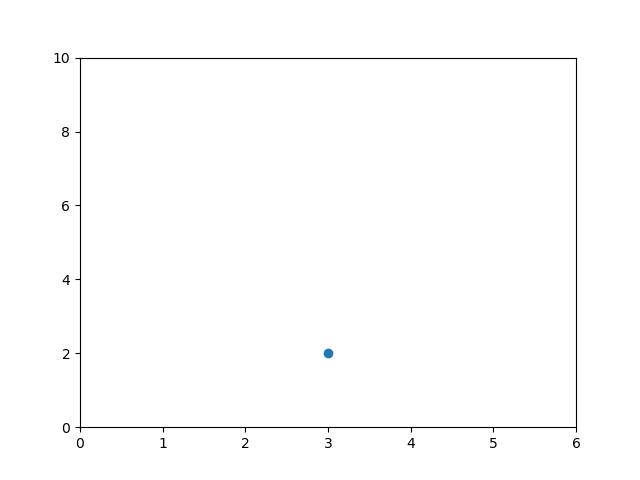

[0, 6, 0, 10]

In [150]:
plt.figure()
plt.plot(3,2,'o')
ax=plt.gca()# get current axis
ax.axis([0,6,0,10])# set axis range[x1,x2,y1,y2]

<IPython.core.display.Javascript object>


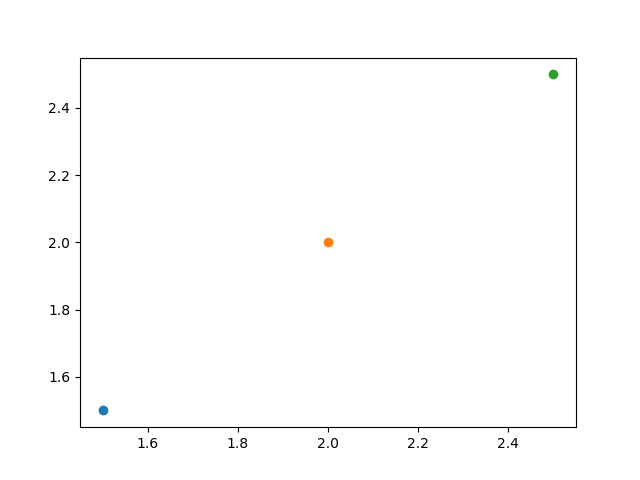

In [151]:
plt.figure()
plt.plot(1.5,1.5,'o')
plt.plot(2,2,'o')
plt.plot(2.5,2.5,'o')

In [152]:
ax=plt.gca()
ax.get_children()

 Text(0.5, 1, ''),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

# scatterplot

<IPython.core.display.Javascript object>


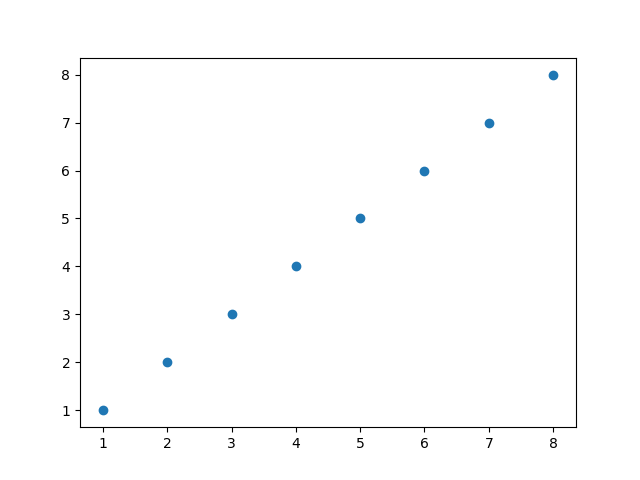

In [153]:
import numpy as np
x= np.array([x for x in range(1,9)])
y=x
plt.figure()
plt.scatter(x,y)

<IPython.core.display.Javascript object>


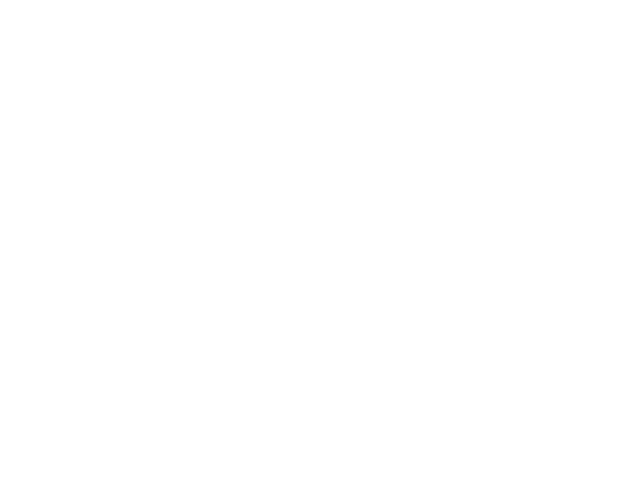

In [117]:
colors=['green']*(len(x)-1)
colors.append('red')
plt.figure()
plt.scatter(x,y,s=100,c=colors)

In [154]:
zip_generator=zip([1,2,3,4,5],[5,6,9,8,7])
print(list(zip_generator))

[(1, 5), (2, 6), (3, 9), (4, 8), (5, 7)]


In [155]:
zip_generator=zip([1,2,3,4,5],[5,6,7,8,9])
x,y=zip(*zip_generator)
print(x)
print(y)

(1, 2, 3, 4, 5)
(5, 6, 7, 8, 9)


<IPython.core.display.Javascript object>


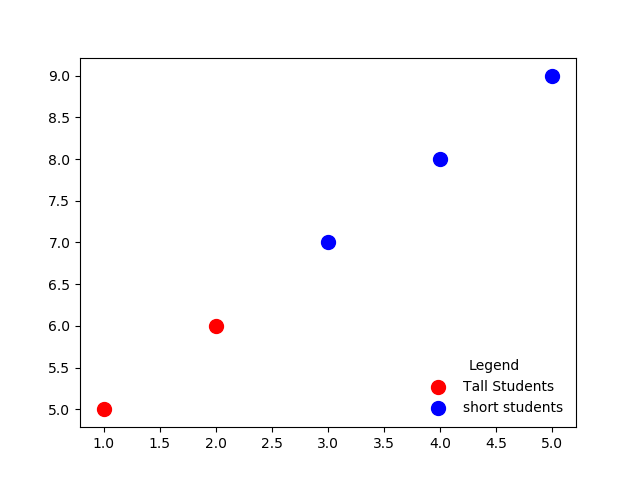

In [156]:
plt.figure()
plt.scatter(x[:2],y[:2],s=100,c='red',label='Tall Students')
plt.scatter(x[2:],y[2:],s=100,c='blue',label='short students')

In [121]:
plt.xlabel('x label')# adding x label 
plt.ylabel('ylabel')#adding y labels
plt.title('title of the graph')

Text(0.5, 1.0, 'title of the graph')

In [157]:
plt.legend(loc=4,frameon=False,title='Legend')

In [158]:
legend=plt.gca().get_children()[-2]

In [159]:
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [160]:
from matplotlib.artist import Artist

def rec_gc(art,depth=0):
    if isinstance(art,Artist):
        print(" "* depth + str(art))
        for child in art.get_children():
            rec_gc(child,depth+2)
rec_gc(legend)

Legend
      Text(0, 0, 'Legend')
            Text(0, 0, 'Tall Students')
            Text(0, 0, 'short students')
  FancyBboxPatch((418.931, 59.7444), width=150.125, height=67)


# line plots

<IPython.core.display.Javascript object>


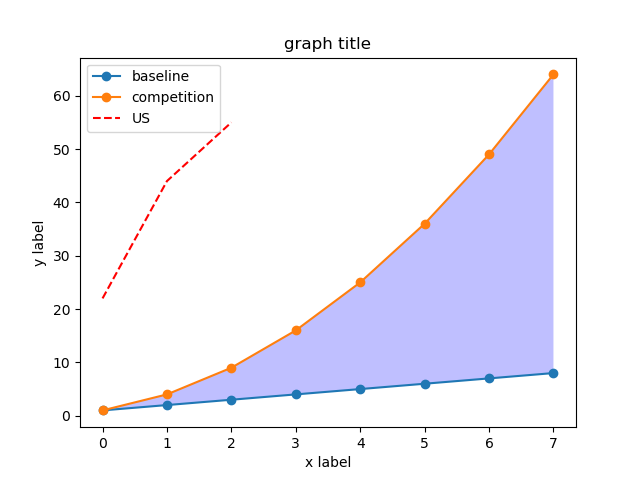

In [161]:
linear_data=np.array([1,2,3,4,5,6,7,8])
quadratic_data=linear_data**2
plt.figure()
plt.plot(linear_data,'-o',quadratic_data,'-o')

In [162]:
plt.plot([22,44,55],'--r')

In [163]:
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('graph title')
plt.legend(['baseline','competition','US'])

In [164]:
plt.gca().fill_between(range(len(linear_data)),
                      linear_data,quadratic_data,
                      facecolor='blue',
                      alpha=0.25)

<IPython.core.display.Javascript object>


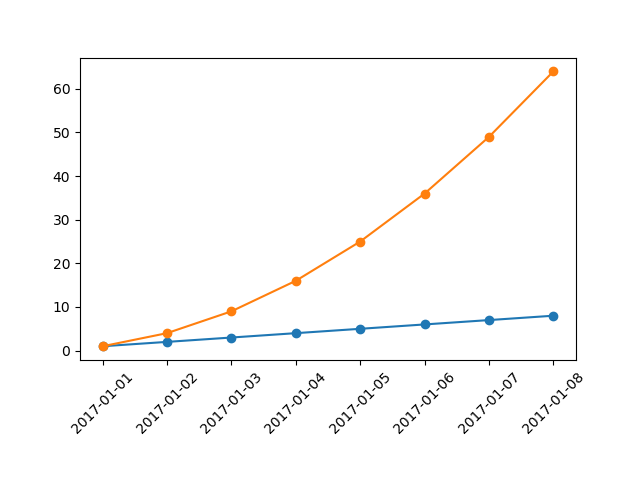

In [165]:
plt.figure()
observation_dates= np.arange('2017-01-01','2017-01-09',dtype='datetime64[D]')

plt.plot(observation_dates,linear_data,'-o',observation_dates,quadratic_data,'-o')

<IPython.core.display.Javascript object>


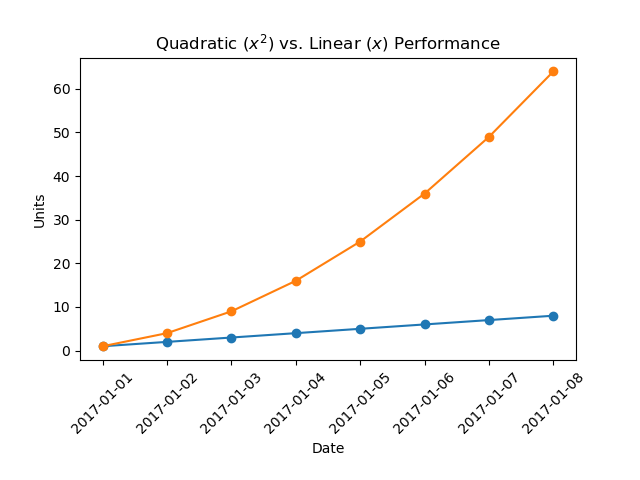

In [169]:
import pandas as pd
plt.figure()
observation_dates= np.arange('2017-01-01','2017-01-09',dtype='datetime64[D]')
observation_dates=list(map(pd.to_datetime,observation_dates))
plt.plot(observation_dates,linear_data,'-o',observation_dates,quadratic_data,'-o')

In [173]:
x=plt.gca().xaxis #to get only x axis

for item in x.get_ticklabels():
    item.set_rotation(45) #remove overlapped dates in graph

In [174]:
plt.subplots_adjust(bottom=0.25)# add a space at the bottom in chart

In [175]:
ax=plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quadrativ vs. Linear Performance')

Text(0.5, 1, 'Quadrativ vs. Linear Performance')

In [176]:
ax.set_title('Quadratic ($x^2$) vs. Linear ($x$) Performance')

Text(0.5, 1, 'Quadratic ($x^2$) vs. Linear ($x$) Performance')


# BAR CHART

<IPython.core.display.Javascript object>


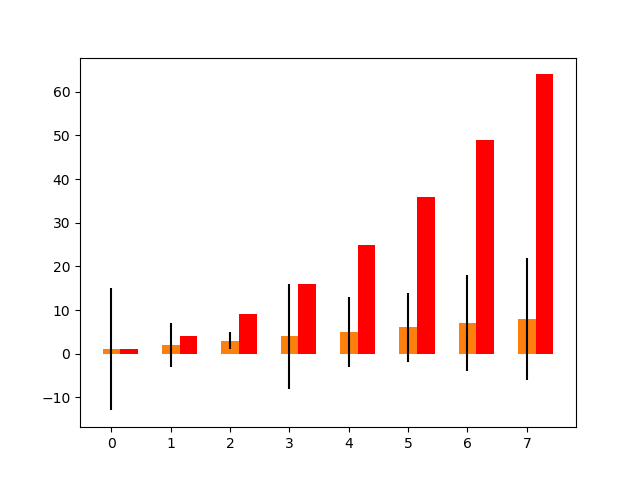

<BarContainer object of 8 artists>

In [177]:
plt.figure()
xvals=range(len(linear_data))
plt.bar(xvals,linear_data,width=0.3)

In [178]:
new_xvals=[item+0.3 for item in xvals]
plt.bar(new_xvals,quadratic_data,width=0.3,color='red')

<BarContainer object of 8 artists>

In [179]:
from random import randint
linear_err=[randint(0,15) for x in range(len(linear_data))]
plt.bar(xvals,linear_data,width=0.3,yerr=linear_err)

<BarContainer object of 8 artists>

<IPython.core.display.Javascript object>


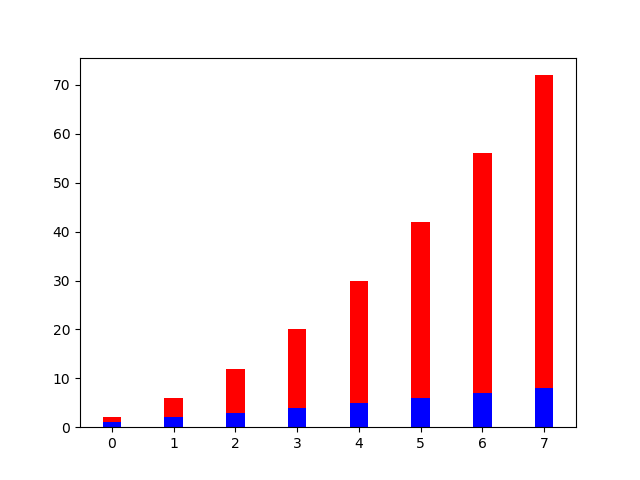

<BarContainer object of 8 artists>

In [180]:

# staked bar chart

plt.figure()
xvals=range(len(linear_data))
plt.bar(xvals,linear_data,width=0.3,color='b')
plt.bar(xvals,quadratic_data,width=0.3,color='r',bottom=linear_data)

<IPython.core.display.Javascript object>


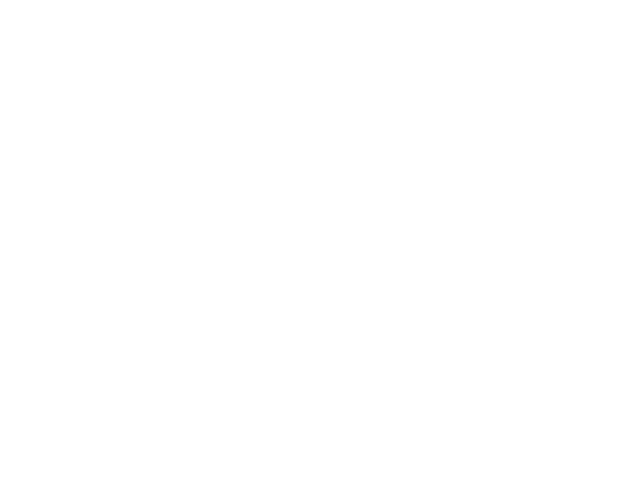

<BarContainer object of 8 artists>

In [140]:
#horizontal staked bar graph
plt.figure()
xvals=range(len(linear_data))
plt.barh(xvals,linear_data,height=0.3,color='b')
plt.barh(xvals,quadratic_data,height=0.3,color='r',left=linear_data)


# subplots

<IPython.core.display.Javascript object>


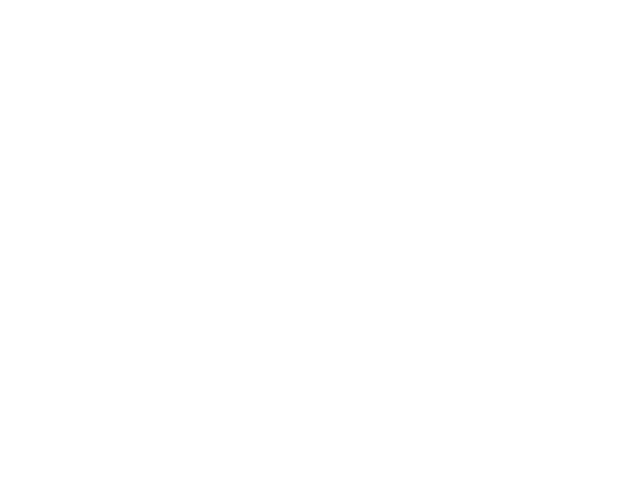

In [181]:
plt.figure()
import matplotlib.pyplot as lt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


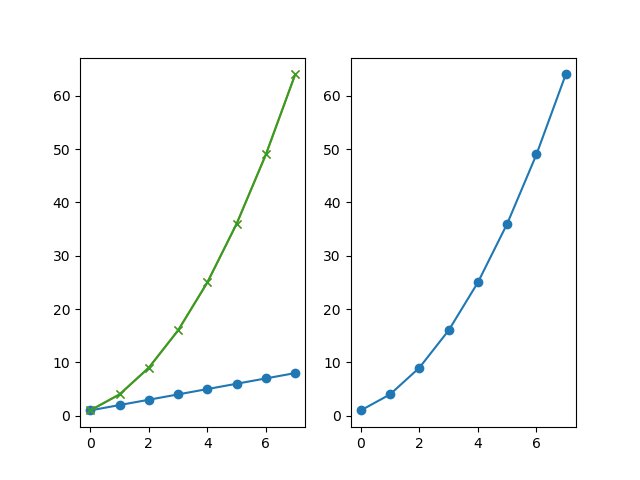

In [183]:
plt.figure()
plt.subplot(1,2,1)
linear_data= np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data,'-o')

exponential_data=linear_data**2
plt.subplot(1,2,2)
plt.plot(exponential_data,'-o')

In [185]:
plt.subplot(1,2,1)
plt.plot(exponential_data,'-x')#problem axis

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


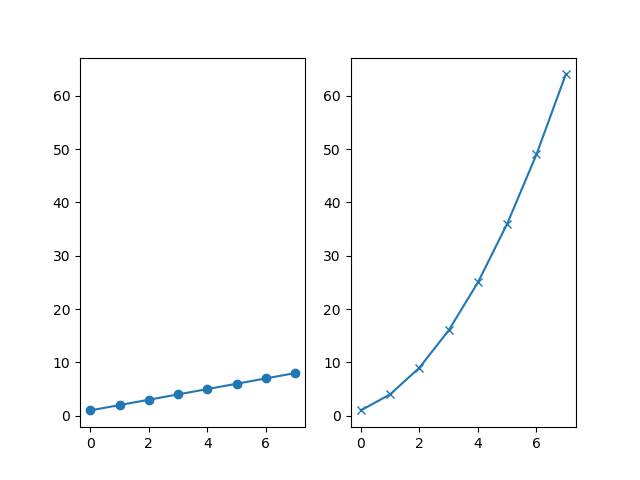

In [186]:
plt.figure()#to add new canvas
ax1=plt.subplot(1,2,1)
plt.plot(linear_data,'-o')
ax2=plt.subplot(1,2,2,sharey=ax1)#it can share y axis of graph ax1
plt.plot(exponential_data,'-x')

<IPython.core.display.Javascript object>


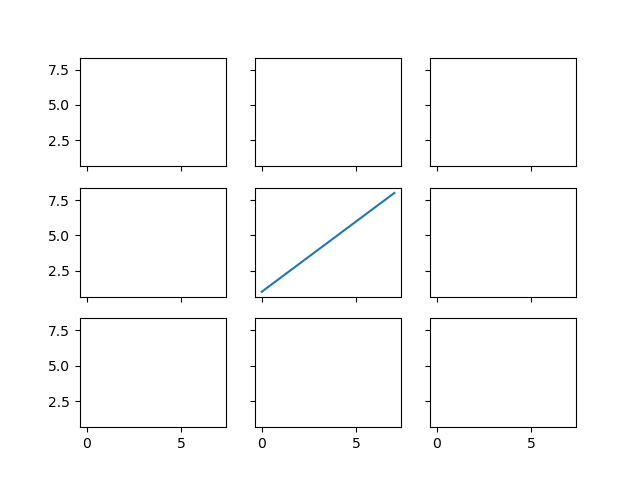

In [189]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9))=plt.subplots(3,3,sharex=True,sharey=True)
ax5.plot(linear_data,'-')

In [192]:
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)
        
        

In [193]:
plt.gcf().canvas.draw()# get current figure

# HISTOGRAMS

<IPython.core.display.Javascript object>


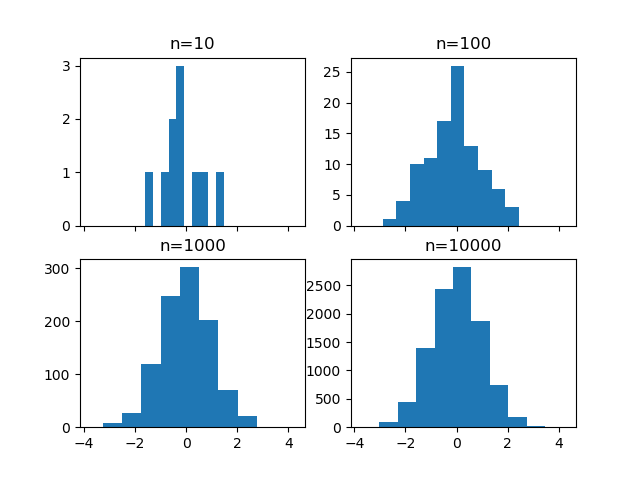

In [197]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True)
axs=[ax1,ax2,ax3,ax4]
for n in range(len(axs)):
    sample_size=10**(n+1)
    sample=np.random.normal(loc=0.0,scale=1.0,size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


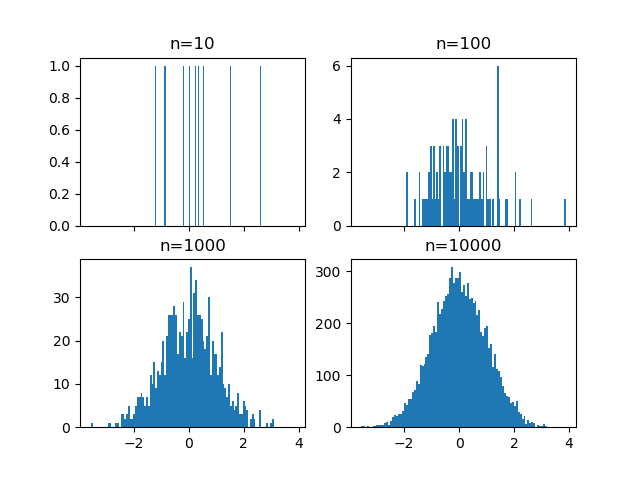

In [198]:
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharex=True)
axs=[ax1,ax2,ax3,ax4]
for n in range(len(axs)):
    sample_size=10**(n+1)
    sample=np.random.normal(loc=0.0,scale=1.0,size=sample_size)
    axs[n].hist(sample,bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


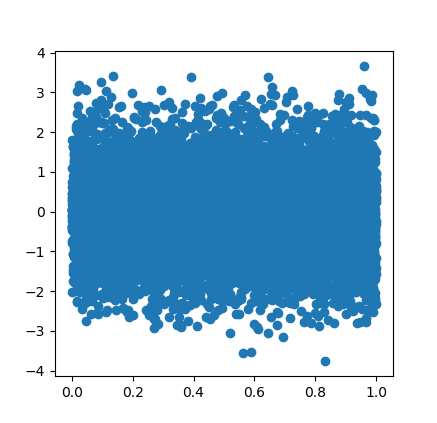

In [200]:
plt.figure()
Y=np.random.normal(loc=0.0,scale=1.0,size=10000)
X=np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


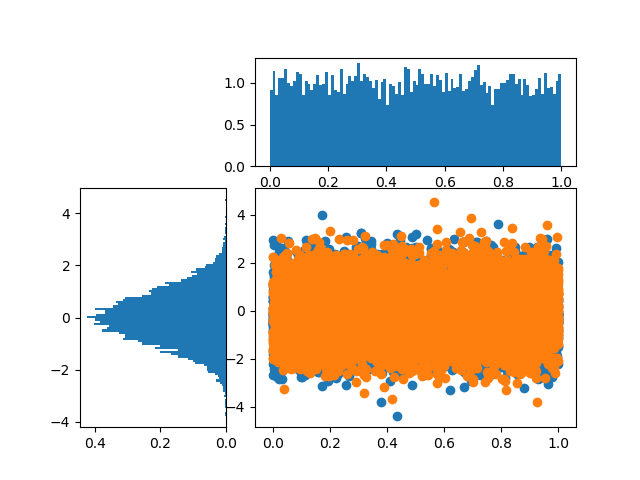

In [201]:
import matplotlib.gridspec as gridspec
plt.figure()

gspec=gridspec.GridSpec(3,3)
top_histogram=plt.subplot(gspec[0,1:])
side_histogram=plt.subplot(gspec[1:,0])
lower_right=plt.subplot(gspec[1:,1:])

In [205]:
Y=np.random.normal(loc=0.0,scale=1.0,size=10000)
X=np.random.random(size=10000)
lower_right.scatter(X,Y)
top_histogram.hist(X,bins=100)
s=side_histogram.hist(Y,bins=100,orientation='horizontal')

In [208]:
top_histogram.clear()#clear the graph
top_histogram.hist(X,bins=100,density=True)
side_histogram.clear()
side_histogram.hist(Y,bins=100,orientation='horizontal',density=True)
side_histogram.invert_xaxis()


# BOX PLOTS

In [209]:
import pandas as pd
normal_sample=np.random.normal(loc=0.0,scale=1.0,size=10000)
random_sample=np.random.random(size=10000)
gamma_sample=np.random.gamma(2,size=10000)

df=pd.DataFrame({
    'normal':normal_sample,
    'random':random_sample,
    'gamma':gamma_sample
})

In [210]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.007762,0.497745,1.975639
std,0.992123,0.289271,1.398913
min,-3.875503,0.000030,0.004013
25%,-0.652705,0.243524,0.952659
50%,-0.000281,0.495382,1.659250
75%,0.680081,0.746348,2.672462
max,3.438533,0.999990,11.482805


<IPython.core.display.Javascript object>


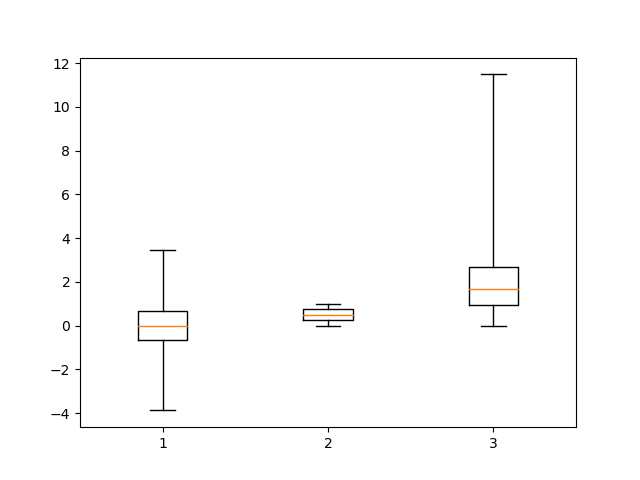

In [211]:
plt.figure()
_=plt.boxplot(df['normal'],whis='range')

In [213]:
plt.clf()
_=plt.boxplot([df['normal'],df['random'],df['gamma']],whis='range')

<IPython.core.display.Javascript object>


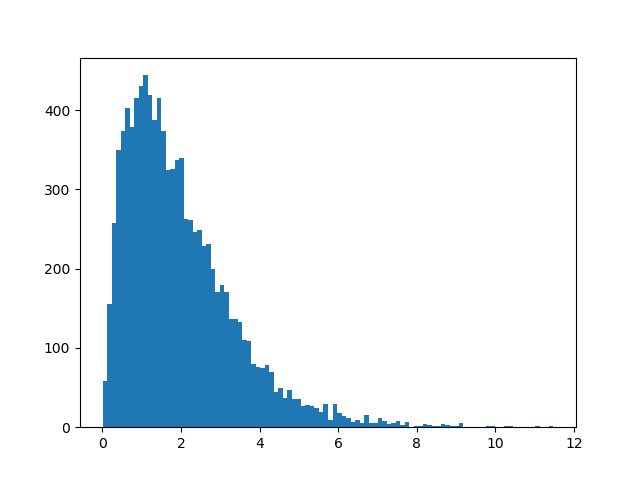

In [214]:
plt.figure()
_=plt.hist(df['gamma'],bins=100)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


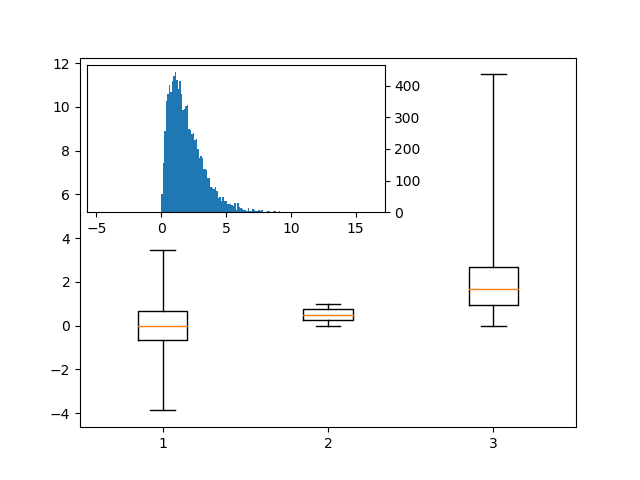

In [215]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
plt.figure()
plt.boxplot([df['normal'],df['random'],df['gamma']],whis='range')
ax2=mpl_il.inset_axes(plt.gca(),width='60%',height='40%',loc=2)
ax2.hist(df['gamma'],bins=100)
ax2.margins(x=0.5)

In [216]:
ax2.yaxis.tick_right()# draw yaxis to right side of the graph


D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


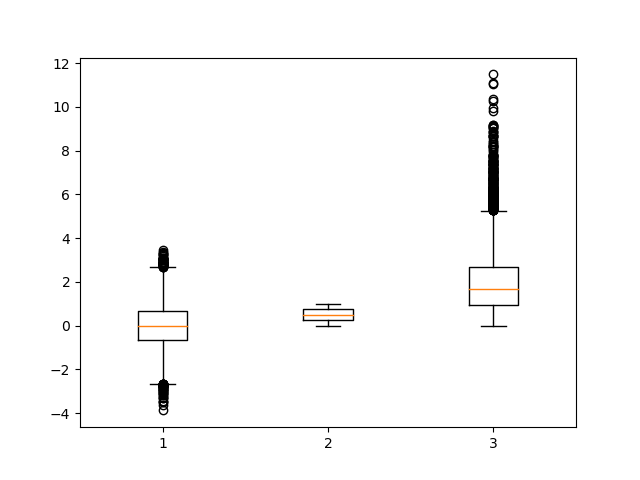

In [217]:
#outlier detection
plt.figure()
_=plt.boxplot([df['normal'],df['random'],df['gamma']])

# HEATMAP

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


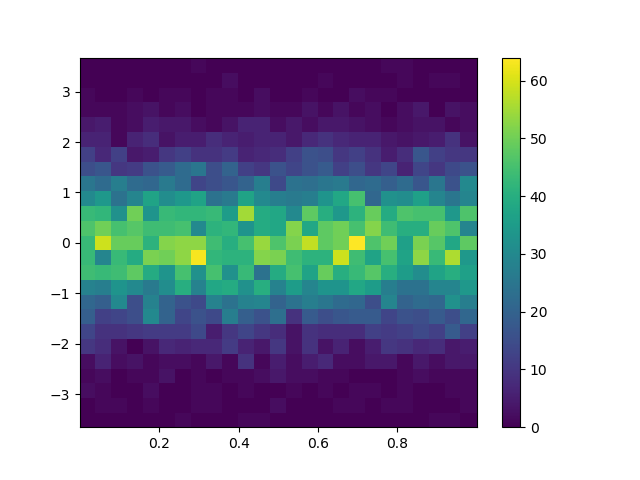

In [222]:
plt.figure()
Y=np.random.normal(loc=0.0,scale=1.0,size=10000)
X=np.random.random(size=10000)
_=plt.hist2d(X,Y,bins=25)# draw heatmap

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


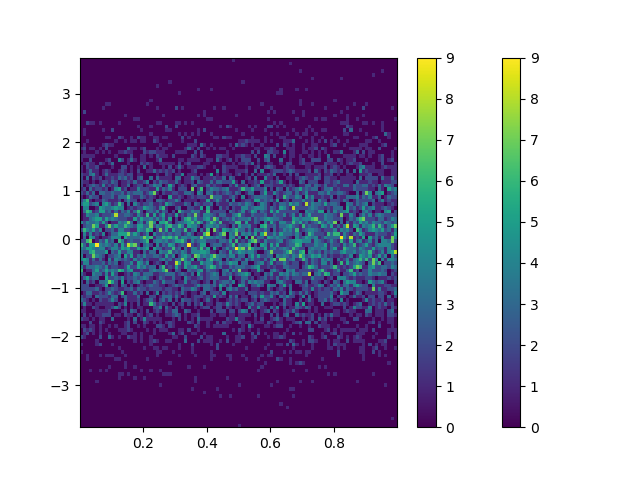

In [219]:
plt.figure()
_=plt.hist2d(X,Y,bins=100)

In [223]:
plt.colorbar()# to show colorbar 


In [224]:
# Animations
import matplotlib.animation as animation

n=100
x=np.random.randn(n)

In [226]:
def update(curr):
    if curr==n:
        a.event_source.stop()
    plt.cla()
    bins=np.arange(-4,4,0.5)
    plt.hist(x[:curr],bins=bins)
    plt.gca().set_title('smaplingthe normal distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n={}'.format(curr),[3,27])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


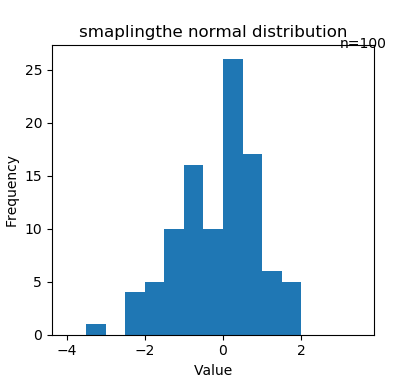

In [227]:
fig=plt.figure()
a=animation.FuncAnimation(fig,update,interval=100)

# INTERACTIVITY

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


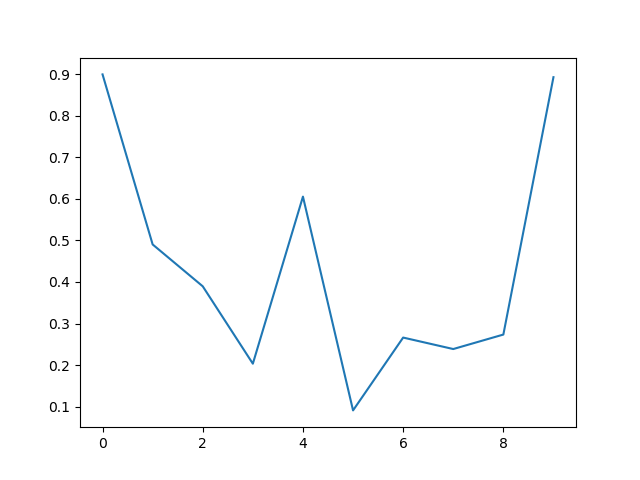

In [228]:
plt.figure()
data=np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('event at pixels {},{} {}and data {},{}'.format(event.x,event.y,'\n',event.xdata,event.ydata))
    plt.gcf().canvas.mpl_connect('button_press_event',onclick)

In [230]:
from random import shuffle
origins=['china','brazil','india','usa','uk','canada','germany','iraq','chile','mexico']
shuffle(origins)
df=pd.DataFrame({
    'height':np.random.rand(10),
    'weight':np.random.rand(10),
    'origin':origins})

df

,height,weight,origin
0,0.934189,0.727168,chile
1,0.778550,0.609120,usa
2,0.636519,0.325393,china
3,0.139365,0.749676,mexico
4,0.138253,0.119951,canada
5,0.279041,0.240149,uk
6,0.210108,0.948586,brazil
7,0.905854,0.169338,germany
8,0.551387,0.002083,india
9,0.935573,0.282563,iraq


D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


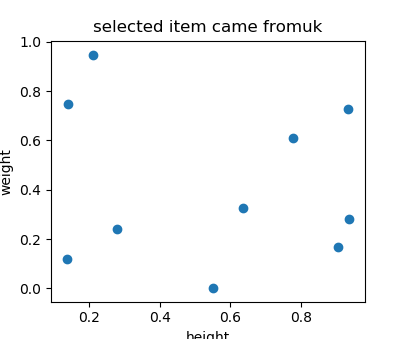

Text(0.5, 0, 'height')

In [231]:
plt.figure()
plt.scatter(df['height'],df['weight'],picker=5)
plt.gca().set_ylabel('weight')
plt.gca().set_xlabel('height')

In [232]:
def onpick(event):
    origin=df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('selected item came from{}'.format(origin))
plt.gcf().canvas.mpl_connect('pick_event',onpick)

7

# pandas visualization

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook


Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "D:\anaconda\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [234]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [235]:
plt.style.use('seaborn-colorblind')

In [236]:
np.random.seed(123)
df=pd.DataFrame({
    'A': np.random.randn(365).cumsum(0),
    'B':np.random.randn(365).cumsum(0)+20,
    'C':np.random.randn(365).cumsum(0)-20},
    index=pd.date_range('1/1/2017',periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


<IPython.core.display.Javascript object>


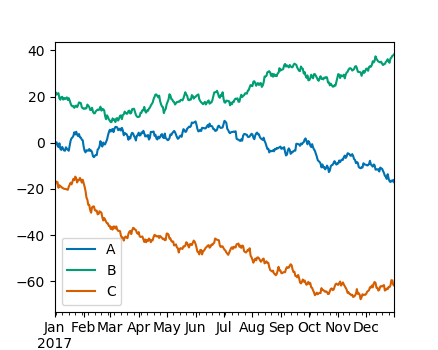

In [237]:
df.plot();#plot data frame


<IPython.core.display.Javascript object>


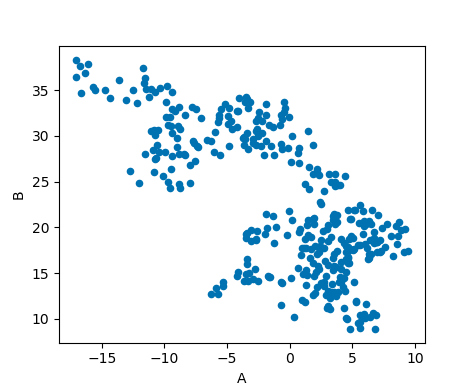

In [240]:
df.plot('A','B',kind='scatter');

<IPython.core.display.Javascript object>


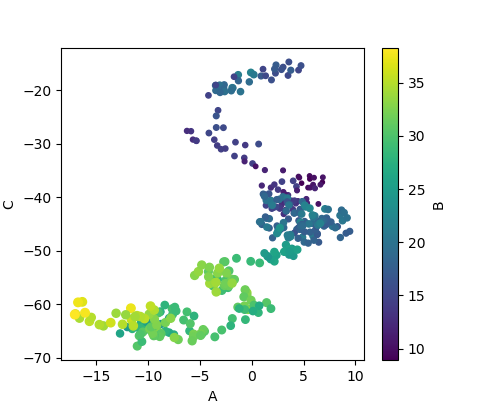

In [241]:
df.plot.scatter('A','C',c='B',s=df['B'],colormap='viridis')

<IPython.core.display.Javascript object>


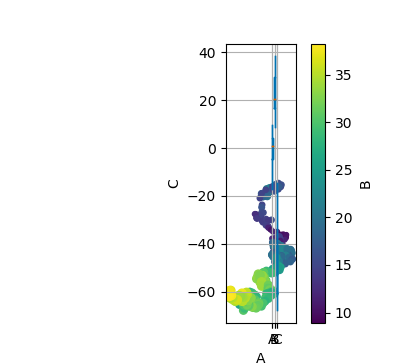

In [242]:
ax=df.plot.scatter('A','C',c='B',s=df['B'],colormap='viridis')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


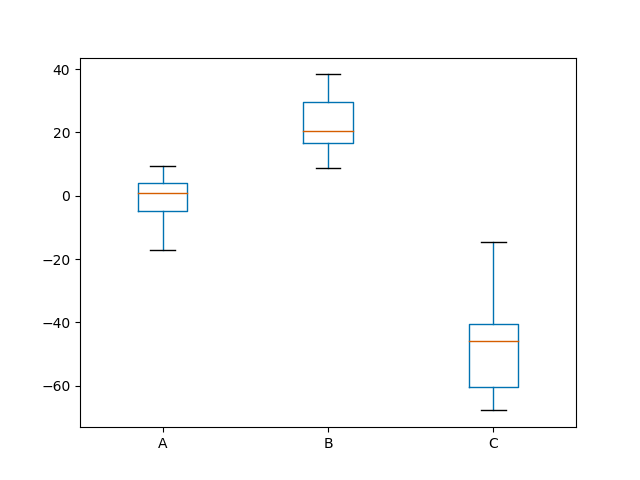

In [245]:
df.plot.box();

<IPython.core.display.Javascript object>


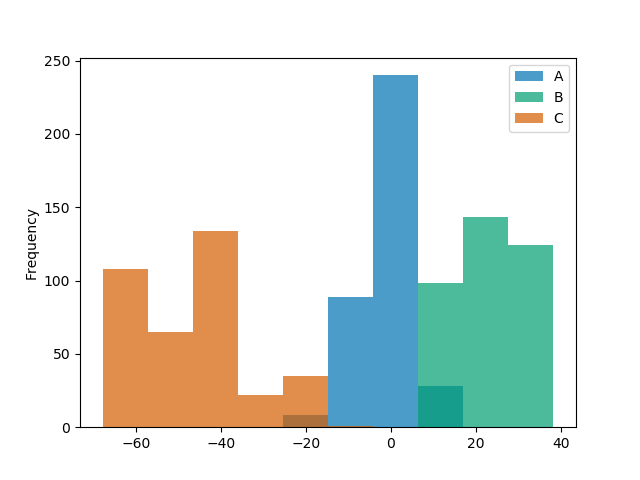

In [246]:
df.plot.hist(alpha=0.7);

<IPython.core.display.Javascript object>


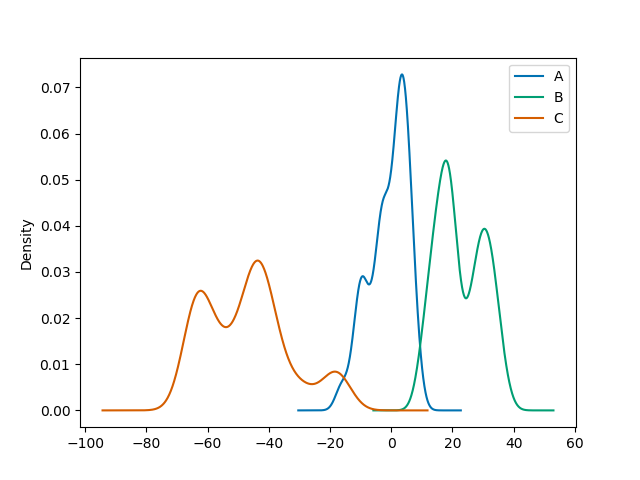

In [247]:
df.plot.kde();


In [251]:
#pandas tools plotting
iris= pd.read_csv('./iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [253]:
pd.tools.plotting.scatter_matrix(iris);
#latest version has bug regarding  this

AttributeError: module 'pandas' has no attribute 'tools'

<IPython.core.display.Javascript object>


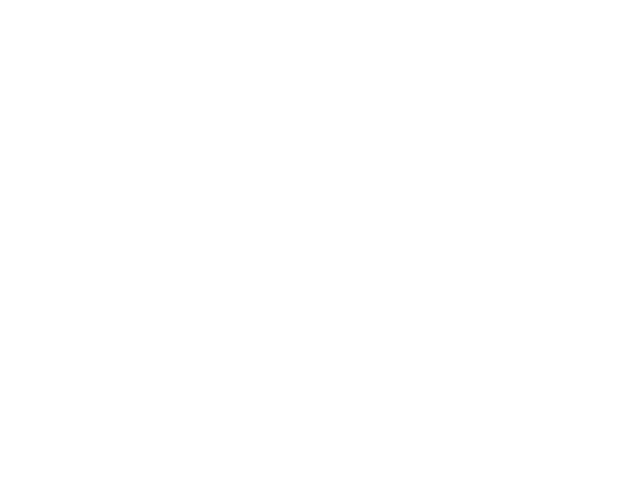

AttributeError: module 'pandas' has no attribute 'tools'

In [254]:
plt.figure()
pd.tools.plotting.parallel_coordinates(iris,'Name');

In [255]:
import seaborn as sns
np.random.seed(1234)
v1=pd.Series(np.random.normal(0,10,1000),name='v1')
v2=pd.Series(2*v1+np.random.normal(60,15,1000),name='v2')


<IPython.core.display.Javascript object>


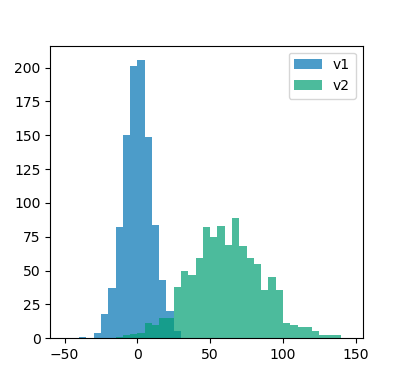

In [256]:
plt.figure()
plt.hist(v1,alpha=0.7,bins=np.arange(-50,150,5),label='v1');
plt.hist(v2,alpha=0.7,bins=np.arange(-50,150,5),label='v2');
plt.legend()

<IPython.core.display.Javascript object>


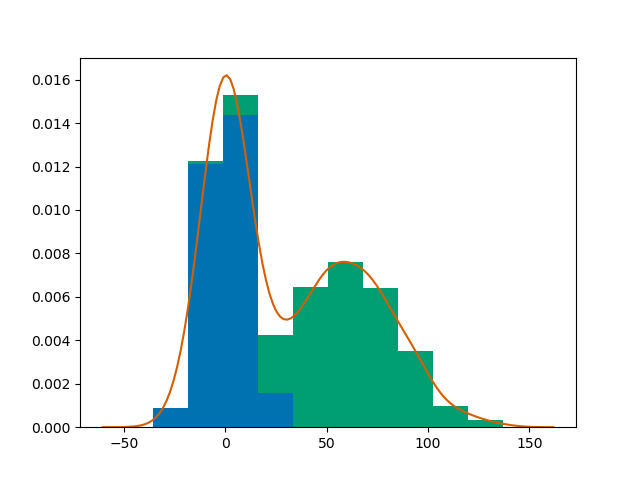

In [259]:
plt.figure()
plt.hist([v1,v2],histtype='barstacked',density=True);
v3=np.concatenate((v1,v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


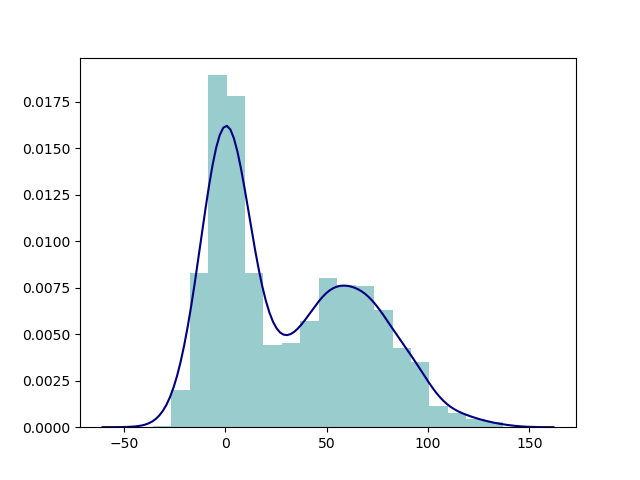

In [260]:
plt.figure()
sns.distplot(v3,hist_kws={'color':'Teal'},kde_kws={'color':'Navy'});

<IPython.core.display.Javascript object>


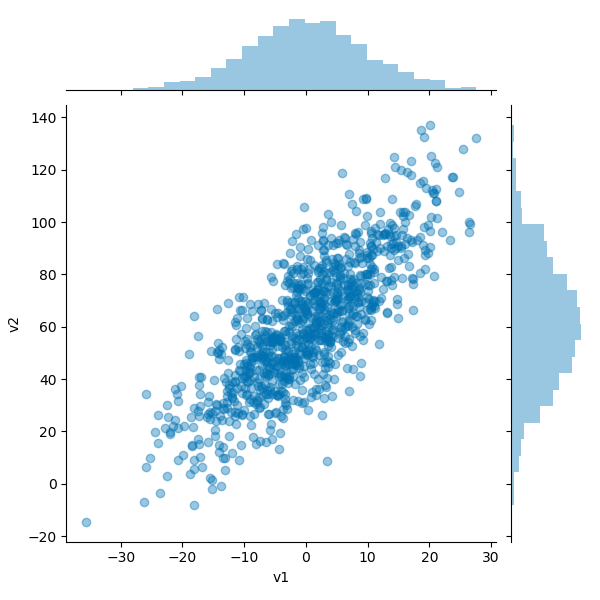

In [262]:
sns.jointplot(v1,v2,alpha=0.4);

<IPython.core.display.Javascript object>


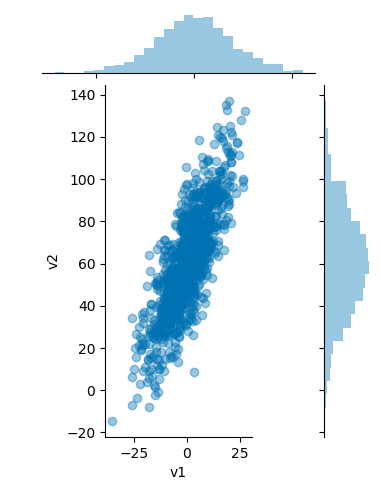

In [263]:
grid=sns.jointplot(v1,v2,alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


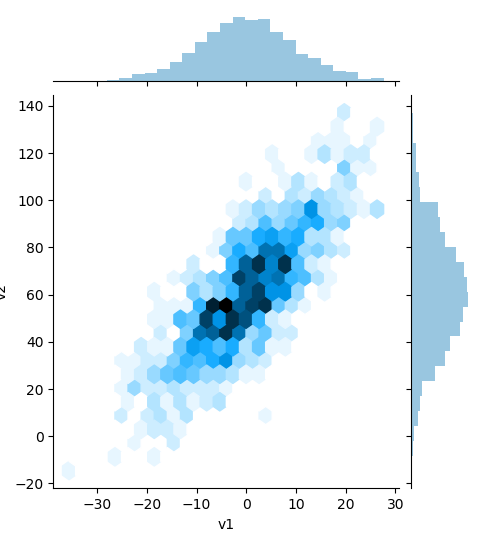

In [265]:
sns.jointplot(v1,v2,kind='hex');

<IPython.core.display.Javascript object>


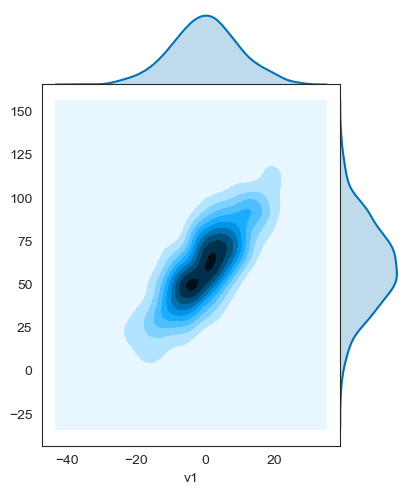

In [266]:
sns.set_style('white')
sns.jointplot(v1,v2,kind='kde',space=0);

In [267]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


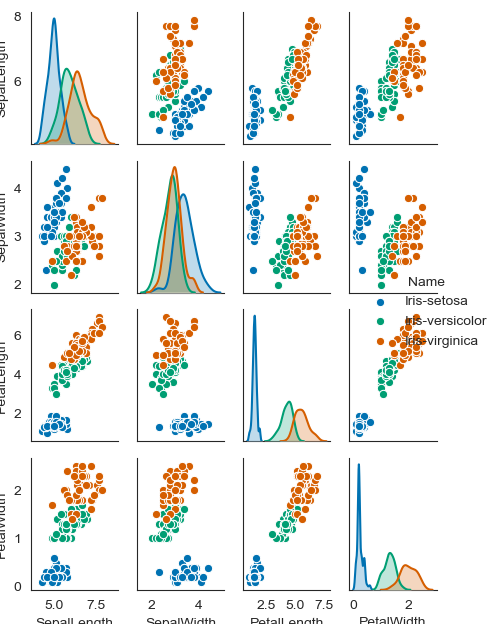

In [268]:
sns.pairplot(iris,hue='Name',diag_kind='kde');

<IPython.core.display.Javascript object>


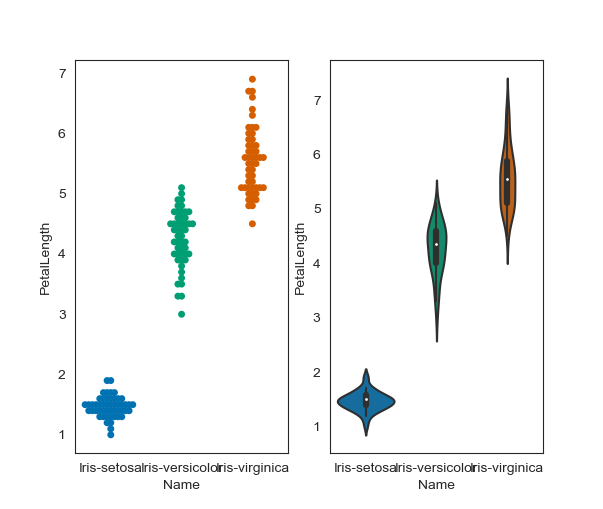

In [269]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.swarmplot('Name','PetalLength',data=iris);
plt.subplot(122)
sns.violinplot('Name','PetalLength',data=iris);